In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv
import gmaps
from us import states
import numpy as np
import requests
from config import gkey
from config import rapid_api_key
from config import rapidapi_host
from pprint import pprint
import datetime

In [2]:
pd.options.display.max_rows = 200
pd.options.display.max_rows

200

In [3]:
# os.getcwd()
# os.chdir('C:\\gitlab\\covid19')

In [4]:
#Import files to use with API's
county_path = 'Resources/us_counties_states.csv'
date_path = 'Resources/dates.csv'

In [5]:
# Create a filter to bring in only California and Indiana
us_counties_df = pd.read_csv(county_path)
mask1 = us_counties_df['State'] == 'California'
mask2 = us_counties_df['State'] == 'Indiana'

us_counties_df = us_counties_df[mask1 | mask2]

In [6]:
date_df = pd.read_csv(date_path)

In [7]:
mask1 = date_df['Date']>'2020-10-10'
date_df=date_df[mask1]
date_df

,Date
203,2020-10-11
204,2020-10-12
205,2020-10-13


### API Calls to Pull Coronavirus Data by County

In [8]:
county_list = []
state_list = []
county_list = us_counties_df['County, State'].tolist()
date_list = date_df['Date'].tolist()

In [9]:
# Run API to collect county level data
# url = "https://covid-19-statistics.p.rapidapi.com/reports"
# headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}

# # County Lists
# county_state_list = []
# new_county_list = []
# tot_county_cases = []
# new_county_cases = []
# tot_county_deaths = []
# new_county_deaths = []
# county_date = []
# county_lat = []
# county_lng = []

# record_counter = 0
# set_counter = 0

# for date_val in date_list:    
#     try:        
#         set_counter += 1

#         for name in county_list:
#             value = name.split(',')
#             county = value[0]
#             state = value[1]
#             country_state = "US " + state
#             record_counter +=1

#             querystring = {"region_province":state,"iso":"USA","region_name":"US","city_name":county, \
#                            "date":date_val,"q":country_state}   

#             response = requests.request("GET", url, headers=headers, params=querystring).json()    

#             try:   
#                 # Add County information
#                 county_state_list.append(response['data'][0]['region']['province'])
#                 new_county_list.append(response['data'][0]['region']['cities'][0]['name'])
#                 tot_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed'])
#                 new_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed_diff'])
#                 tot_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths'])
#                 new_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths_diff'])
#                 county_date.append(response['data'][0]['region']['cities'][0]['date'])
#                 county_lat.append(response['data'][0]['region']['cities'][0]['lat'])
#                 county_lng.append(response['data'][0]['region']['cities'][0]['long'])

#                 if record_counter > 150:
#                     record_counter = 1
#                     set_counter += 1

#                 print(f'Processing record {record_counter} of set {set_counter} | {county}, {state}, {date_val}.')

#             except:
#                 record_counter -= 1
#                 print(f'Error: County: {county} and State:{state} not found for: {date_val}')
                
#         set_counter += 1
        
#     except:
#         print(f'Date Error: {date_val} was not processed')
            
# print(f'---------------------------------Process Completed----------------------------------------')


In [10]:
# Create dataframe for county level data
# covid_county_new_df = pd.DataFrame({
#     "State" : county_state_list,
#     "County" : new_county_list,
#     "Total Cases" : tot_county_cases,
#     "New Cases" : new_county_cases,
#     "Total Deaths" : tot_county_deaths,
#     "New Deaths" : new_county_deaths,
#     "Date" : county_date,
#     "Latitude" : county_lat,
#     "Longitude" : county_lng   
# })

# covid_county_new_df.to_csv('Resources/covid_county_df.csv', mode='a', index=False, header=False)

### API Calls to Pull Coronavirus Data by State

In [11]:
# Use this API call to get the state information without the county level detail
# us_state_df = pd.read_csv('Resources/us_counties_states.csv')

# state_list = []

# s_list = us_state_df['State'].tolist()

# for item in s_list:
#     if item not in state_list:
#         state_list.append(item)

# # State lists
# new_state = []
# total_cases_state = []
# new_cases_state = []
# tot_deaths_state = []
# new_deaths_state = []
# fatality_rate_state = []
# date_state = []
# lat_state = []
# long_state = []

# url = "https://covid-19-statistics.p.rapidapi.com/reports"
# headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}

# state_record_counter = 0
# state_set_counter = 0

# for date_val in date_list:
    
#     try:    
#         state_set_counter += 1
    
#         for state in state_list:
            
#             state_record_counter +=1
            
#             try:                
#                 querystring = {"iso":"USA", "region_province":state, "date":date_val}                
#                 response = requests.request("GET", url, headers=headers, params=querystring).json()

#                 new_state.append(response['data'][0]['region']['province'])
#                 lat_state.append(response['data'][0]['region']['lat'])
#                 long_state.append(response['data'][0]['region']['long'])
#                 total_cases_state.append(response['data'][0]['confirmed'])
#                 new_cases_state.append(response['data'][0]['confirmed_diff'])
#                 tot_deaths_state.append(response['data'][0]['deaths'])
#                 new_deaths_state.append(response['data'][0]['deaths_diff'])
#                 fatality_rate_state.append(response['data'][0]['fatality_rate'])
#                 date_state.append(response['data'][0]['date']) 
                
#                 if state_record_counter > 51:
#                     state_record_counter = 1
# #                     state_set_counter += 1
                    
#                 print(f'Processing record {state_record_counter} for set {state_set_counter} | {state} - {date_val}')
                
#             except:
#                 state_record_counter -= 1
#                 print(f'State error: {state} not found for {date_val}')
            
#     except:        
#         print(f'Date error: {state} is not found for {date_val}')
              
# print(f'---------------------------------Process Completed----------------------------------------')

In [12]:
# Create dataframe based on state data
# covid_state_new_df = pd.DataFrame({
#     "State" : new_state,
#     "Total Cases" : total_cases_state,
#     "New Cases" : new_cases_state,
#     "Total Deaths" : tot_deaths_state,
#     "New Deaths" : new_deaths_state,
#     "Fatality Rate" : fatality_rate_state,
#     "Latitude" : lat_state,
#     "Longitude" : long_state,
#     "Date" : date_state    
# })    

# covid_state_new_df.to_csv('Resources/covid_state_df.csv', mode='a', index=False, header=False )
# covid_state_new_df.head(2)

In [13]:
# Import data from .csv files and create dataframes for state and county
state_data_path = 'Resources/covid_state_df.csv'
county_data_path = 'Resources/covid_county_df.csv'
covid_state_df = pd.read_csv(state_data_path, index_col='State')
covid_county_df = pd.read_csv(county_data_path, index_col='State')
state_plots_df = pd.read_csv(state_data_path, index_col='Date')

### Top 5 States With the Most Coronavirus Cases

In [14]:
# Show the top 5 states having the most coronavirus cases
state_group = covid_state_df.groupby('State')
covid_state_df=covid_state_df.sort_values(by='Date', ascending=False)
covid_state_df

last_state_date_df = state_group.last()
last_state_date_df.sort_values(by=['Date', 'Total Cases'], ascending=[False,False], inplace=True)
last_state_date_df.head(5)

,Total Cases,New Cases,Total Deaths,New Deaths,Fatality Rate,Latitude,Longitude,Date
State,,,,,,,,
California,861310,3397,16644,58,0.0193,36.1162,-119.6816,2020-10-13
Texas,826816,5706,17078,83,0.0207,31.0545,-97.5635,2020-10-13
Florida,738749,2725,15531,119,0.0210,27.7663,-81.6868,2020-10-13
New York,476708,1393,33306,5,0.0699,42.1657,-74.9481,2020-10-13
Georgia,333304,993,7454,25,0.0224,33.0406,-83.6431,2020-10-13


### Total Cases by State Heatmap (All States)

In [15]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [16]:
# Store Lat and lng into locations
locations = last_state_date_df[['Latitude', "Longitude"]].astype(float)

total_cases=last_state_date_df['Total Cases'].astype(float)

In [17]:
# # Configure gmaps with API key
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=total_cases,
                                 dissipating=False, max_intensity=50,
                                 point_radius=1)                                 
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

### Total Cases by County Heatmap (California & Indiana)

In [18]:
# Create a dataframe based on county information
covid_county_df.sort_values(by='Date', ascending=False, inplace=True)
county_group = covid_county_df.groupby(['State', 'County'])
covid_county_last_df = county_group.first()
covid_county_last_df.sort_values(by=['State', 'Total Cases'], ascending=[False, False], inplace=True)

In [19]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [20]:
# Store Lat and lng into locations
locations = covid_county_last_df[['Latitude', "Longitude"]].astype(float)
total_cases=covid_county_last_df['Total Cases'].astype(float)

In [21]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=total_cases,
                                 dissipating=False, max_intensity=.5,
                                 point_radius=1.5)                           
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

### Total Coronavirus Cases by County

In [22]:
# Show the total coronavirus cases by county in California
california_cases_by_county_df = covid_county_last_df.loc['California']
california_cases_by_county_df

,Total Cases,New Cases,Total Deaths,New Deaths,Date,Latitude,Longitude
County,,,,,,,
Los Angeles,283750,768,6790,17,2020-10-13,34.308284,-118.228241
Riverside,62553,441,1258,2,2020-10-13,33.743150,-115.993358
San Bernardino,58579,454,986,0,2020-10-13,34.840603,-116.177469
Orange,56070,178,1341,0,2020-10-13,33.701475,-117.764600
San Diego,51024,278,840,14,2020-10-13,33.034846,-116.736533
Kern,33020,54,395,0,2020-10-13,35.343294,-118.727780
Fresno,29523,104,424,18,2020-10-13,36.757339,-119.646695
Sacramento,23850,72,458,8,2020-10-13,38.451068,-121.342537
Santa Clara,22741,97,363,1,2020-10-13,37.231049,-121.697046


In [23]:
# Show the total coronavirus cases by county in Indiana
indiana_cases_by_county_df = covid_county_last_df.loc['Indiana']
indiana_cases_by_county_df

,Total Cases,New Cases,Total Deaths,New Deaths,Date,Latitude,Longitude
County,,,,,,,
Marion,23512,198,772,1,2020-10-13,39.781636,-86.138263
Lake,12087,116,339,0,2020-10-13,41.418743,-87.382776
St. Joseph,8088,121,146,4,2020-10-13,41.617568,-86.290408
Elkhart,7732,86,126,0,2020-10-13,41.597612,-85.858757
Allen,7240,82,213,1,2020-10-13,41.091943,-85.068006
Hamilton,5561,32,112,2,2020-10-13,40.073065,-86.052447
Vanderburgh,5056,106,45,3,2020-10-13,38.026588,-87.587631
Tippecanoe,3204,35,13,0,2020-10-13,40.388727,-86.894140
Monroe,3054,39,37,0,2020-10-13,39.161300,-86.524144


### Plot Total Coronavirus cases in California

In [24]:
cal_plots_df=state_plots_df[['State', 'Total Cases']]
mask1 = cal_plots_df['State']=='California'
mask2 = cal_plots_df['State'] == 'Indiana'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'Total Covid Cases')

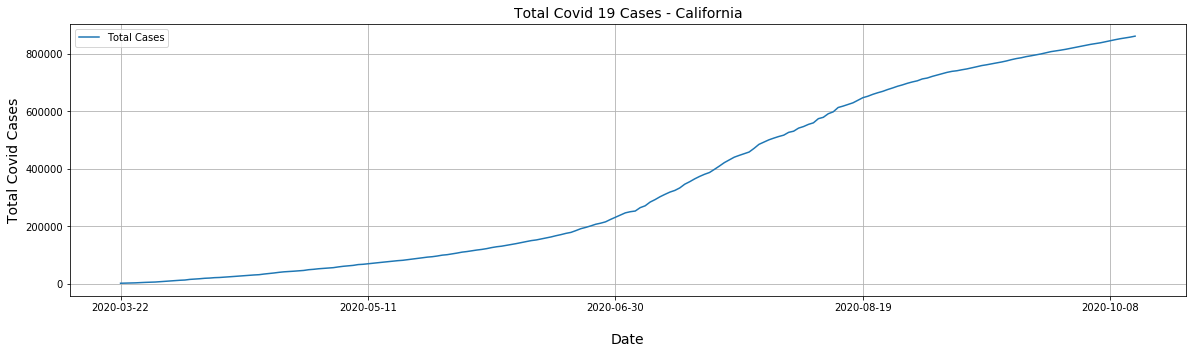

In [25]:
cal_plots_df.plot.line( y='Total Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Cases - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Cases', fontsize=14)

In [26]:
tot_cases_today = last_state_date_df.loc['California']['Total Cases']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of coronavirus cases reported on {date}: {tot_cases_today:,}')

Total number of coronavirus cases reported on 2020-10-13: 861,310


### Plot Total Coronavirus cases in Indiana

In [27]:
ind_plots_df=state_plots_df[['State', 'Total Cases']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'Total Covid Cases')

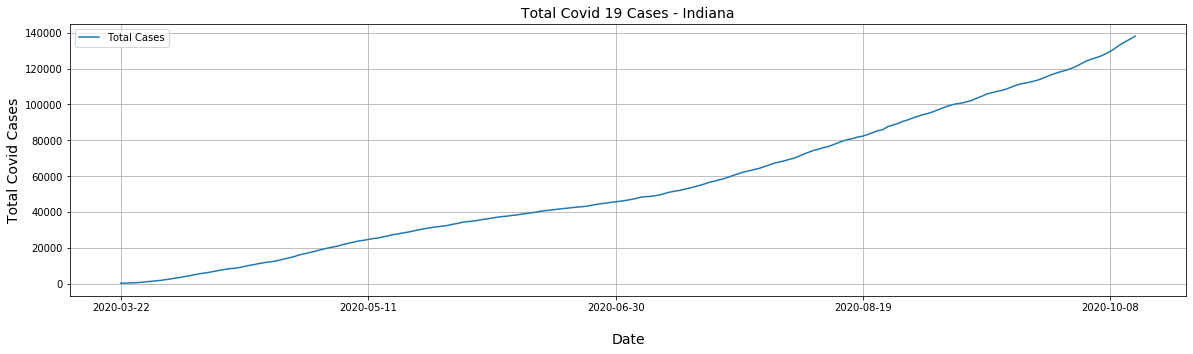

In [28]:
ind_plots_df.plot.line( y='Total Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Cases - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Cases', fontsize=14)

In [29]:
tot_cases_today = last_state_date_df.loc['Indiana']['Total Cases']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of coronavirus cases reported on {date}: {tot_cases_today:,}')

Total number of coronavirus cases reported on 2020-10-13: 138,104


### Plot New Coronavirus cases in California

In [30]:
cal_plots_df=state_plots_df[['State', 'New Cases']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'New Covid Cases')

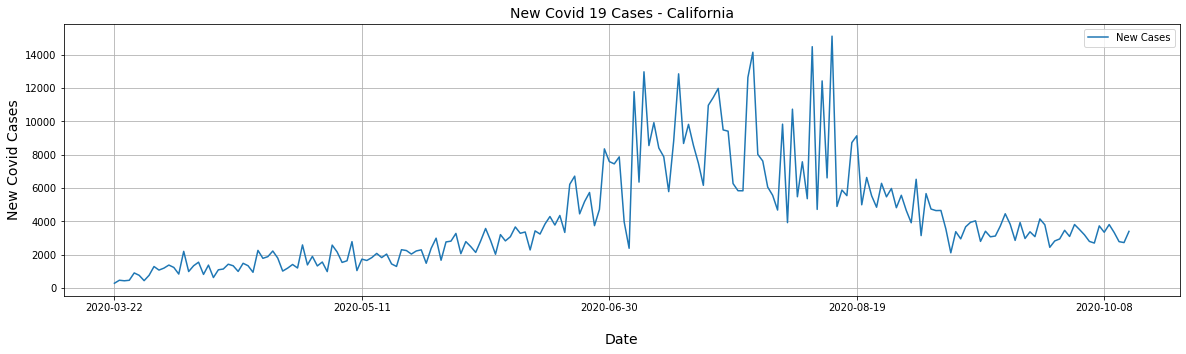

In [31]:
cal_plots_df.plot.line( y='New Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Cases - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Cases', fontsize=14)

In [32]:
new_cases_today = last_state_date_df.loc['California']['New Cases']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of new coronavirus cases reported on {date}: {new_cases_today:,}')

Total number of new coronavirus cases reported on 2020-10-13: 3,397


### Plot New Coronavirus cases in Indiana

In [33]:
ind_plots_df=state_plots_df[['State', 'New Cases']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'New Covid Cases')

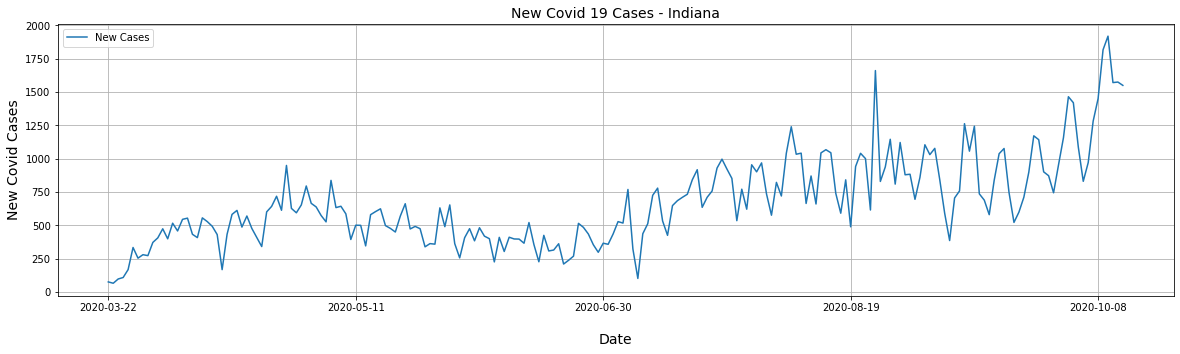

In [34]:
ind_plots_df.plot.line( y='New Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Cases - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Cases', fontsize=14)

In [35]:
new_cases_today = last_state_date_df.loc['Indiana']['New Cases']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of new coronavirus cases reported on {date}: {new_cases_today:,}')

Total number of new coronavirus cases reported on 2020-10-13: 1,549


### Plot Total Coronavirus Deaths in California

In [36]:
cal_plots_df=state_plots_df[['State', 'Total Deaths']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'Total Covid Deaths')

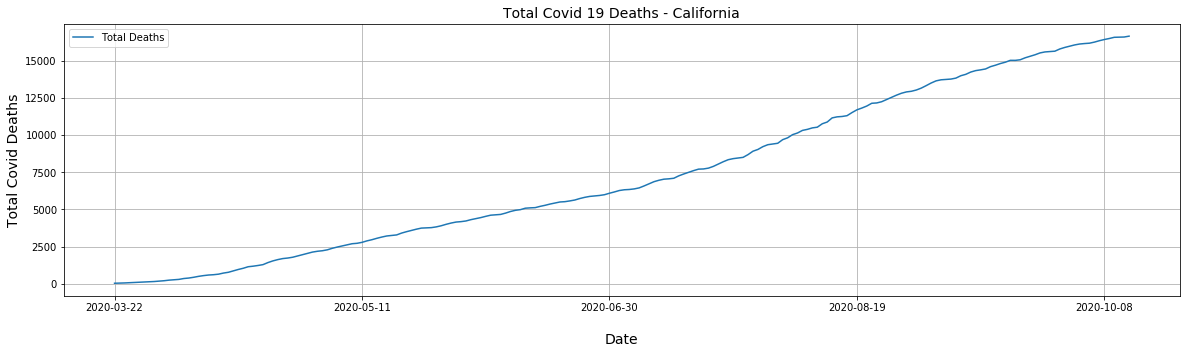

In [37]:
cal_plots_df.plot.line( y='Total Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Deaths - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Deaths', fontsize=14)

In [38]:
tot_deaths = last_state_date_df.loc['California']['Total Deaths']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of coronavirus deaths as of {date}: {tot_deaths:,}')

Total number of coronavirus deaths as of 2020-10-13: 16,644


### Plot Total Coronavirus Deaths in Indiana

In [39]:
ind_plots_df=state_plots_df[['State', 'Total Deaths']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'Total Covid Deaths')

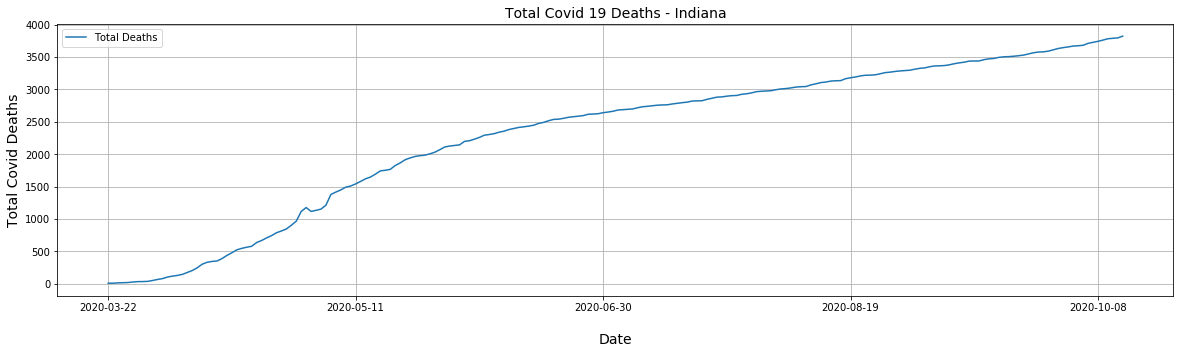

In [40]:
ind_plots_df.plot.line( y='Total Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Deaths - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Deaths', fontsize=14)

In [41]:
tot_deaths = last_state_date_df.loc['Indiana']['Total Deaths']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of coronavirus deaths as of {date}: {tot_deaths:,}')

Total number of coronavirus deaths as of 2020-10-13: 3,822


### Plot New Coronavirus Deaths in California

In [42]:
cal_plots_df=state_plots_df[['State', 'New Deaths']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'New Covid Deaths')

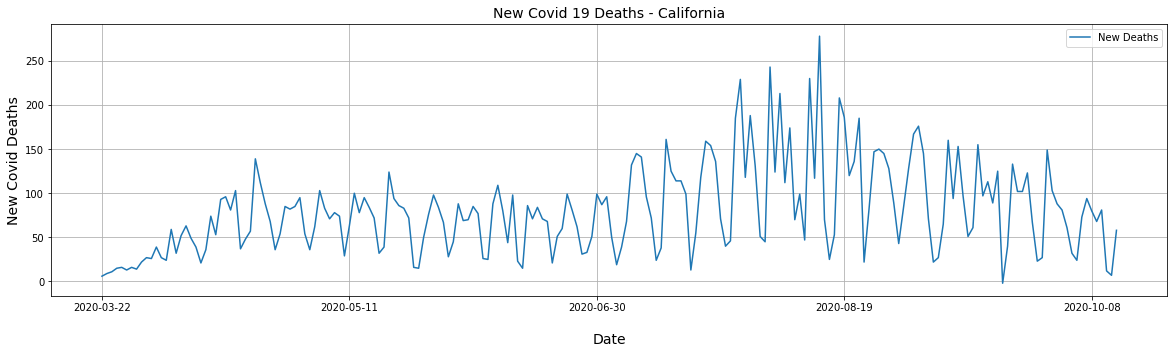

In [43]:
cal_plots_df.plot.line( y='New Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Deaths - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Deaths', fontsize=14)

In [44]:
new_deaths = last_state_date_df.loc['California']['New Deaths']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of new coronavirus deaths reported on {date}: {new_deaths:,}')

Total number of new coronavirus deaths reported on 2020-10-13: 58


### Plot New Coronavirus Deaths in Indiana

In [45]:
ind_plots_df=state_plots_df[['State', 'New Deaths']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'New Covid Deaths')

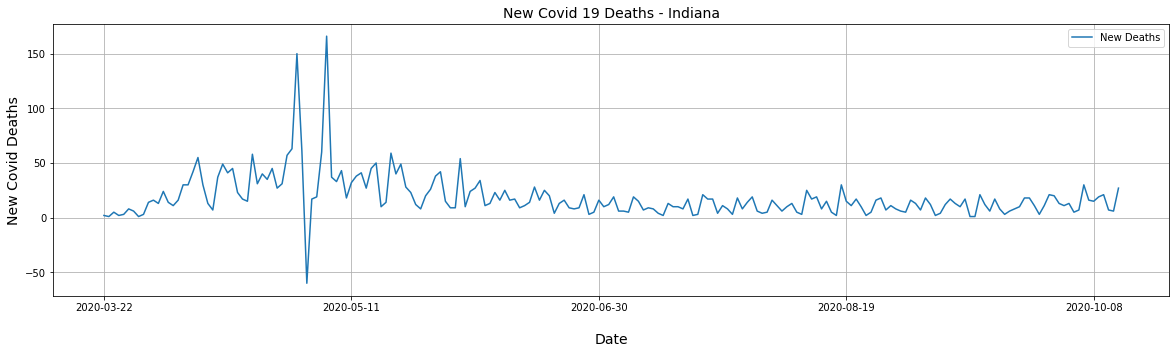

In [46]:
ind_plots_df.plot.line( y='New Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Deaths - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Deaths', fontsize=14)

In [47]:
new_deaths = last_state_date_df.loc['Indiana']['New Deaths']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of new coronavirus deaths reported on {date}: {new_deaths:,}')

Total number of new coronavirus deaths reported on 2020-10-13: 27
